In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
from bs4 import BeautifulSoup as bs
import numpy as np

## Results All

In [19]:
all_df = pd.concat([pd.read_csv("tes1.csv"), pd.read_csv("tes2.csv"), pd.read_csv("tes3.csv"), pd.read_csv("tes4.csv")]\
              ).iloc[:,1:].drop_duplicates()

In [20]:
all_df.shape

(432, 13)

In [50]:
all_df.head()

,merchant_name,broken_link_score,link_contact_us_exist,cu_email_exist,cu_phone_number_exist,link_about_us_exist,link_tnc_exist,tnc_refund_policy_exist,contact_us_score,tnc_score,broken_links,website,label
0,CV.ASIATRIPINDONESIA,0.0,1.0,1.0,1.0,0.0,1.0,1.0,100.0,100.0,{},http://asiatrip.id/,APPROVED
1,Pt.BloomingLotusYoga,0.0,1.0,1.0,1.0,1.0,1.0,0.0,100.0,50.0,{},https://www.blooming-lotus-yoga.com,APPROVED
2,YayasanGreenSejahtera,0.0,1.0,1.0,1.0,1.0,1.0,1.0,100.0,100.0,{},https://greensejahterafoundation.com/,APPROVED
3,PTMatairTerraSolusi,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,{},http://www.matair.co.id,APPROVED
4,SimplyMii,0.0,1.0,1.0,1.0,0.0,0.0,0.0,100.0,0.0,{},https://www.simplymii.com/,APPROVED


In [43]:
all_df.groupby("label").size()

label
APPROVED    300
REJECTED     25
REVIEWED    107
dtype: int64

In [69]:
## Inspect the negative label
negative_df = all_df[all_df.label == 'REJECTED']

In [71]:
negative_df.head()

,merchant_name,broken_link_score,link_contact_us_exist,cu_email_exist,cu_phone_number_exist,link_about_us_exist,link_tnc_exist,tnc_refund_policy_exist,contact_us_score,tnc_score,broken_links,website,label
7,YoYoMats,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,100.0,{},https://yoyomatsindonesia.myshopify.com,REJECTED
10,SisilShop,100.0,1.0,0.0,0.0,0.0,1.0,0.0,33.333333,0.0,{'': 'None'},SisilShop.com,REJECTED
11,GammaMedia,100.0,1.0,0.0,0.0,0.0,1.0,0.0,33.333333,0.0,{'': 'None'},http://gammamedia.co.id,REJECTED
12,ShinhwaGlobalSakuraBear,100.0,1.0,0.0,0.0,0.0,1.0,0.0,33.333333,0.0,{'': 'None'},http://www.shinhwaglobalsakurabearinternationa...,REJECTED
13,Gitra,12.5,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,50.0,{'http://s.my.id': 'None'},s.id/StartFromTheBottom,REJECTED


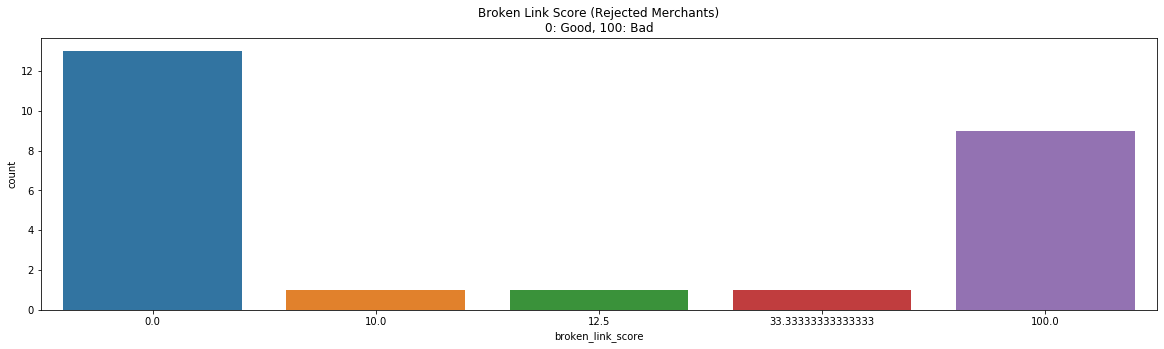

In [72]:
## Plot broken link score
plt.figure(figsize=(20,5))
plt.title("Broken Link Score (Rejected Merchants)\n0: Good, 100: Bad")
sns.countplot(negative_df.broken_link_score)
plt.show()

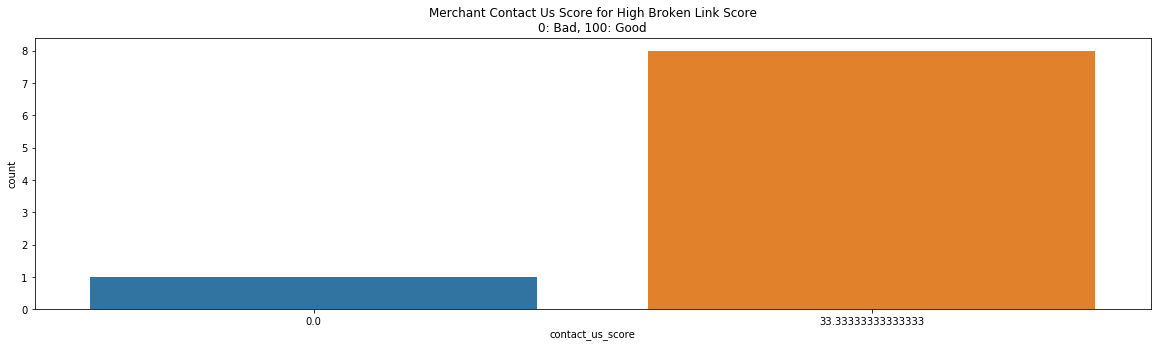

In [82]:
## Inspecting High Broken Link Score vs. Contact Us Score
plt.figure(figsize=(20,5))
plt.title("Merchant Contact Us Score for High Broken Link Score\n0: Bad, 100: Good")
sns.countplot(negative_df.contact_us_score[negative_df.broken_link_score == 100])
plt.show()

In [87]:
## Merchants with CU Score > 0 & BL Score 100
negative_df[(negative_df.contact_us_score > 0) & (negative_df.broken_link_score == 100)]\
[['website','contact_us_score','broken_link_score','link_contact_us_exist','cu_email_exist']]

,website,contact_us_score,broken_link_score,link_contact_us_exist,cu_email_exist
10,SisilShop.com,33.333333,100.0,1.0,0.0
11,http://gammamedia.co.id,33.333333,100.0,1.0,0.0
12,http://www.shinhwaglobalsakurabearinternationa...,33.333333,100.0,1.0,0.0
14,Www.mitsubishiputribali.com,33.333333,100.0,1.0,0.0
15,www.sdntamunti.com,33.333333,100.0,1.0,0.0
17,Www.Klink.com,33.333333,100.0,1.0,0.0
18,Merahhitam.com,33.333333,100.0,1.0,0.0
45,Https://Facebook.com/andiktamvan,33.333333,100.0,1.0,0.0


CU score diatas adalah kesalahan crawler, removing keywords = ["cs", "tc", "tos"]